## scratch stuff from chapter 3

In [1]:
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [2]:
X, y = mnist["data"], mnist["target"]
print(X.shape, y.shape)

(70000, 784) (70000,)


In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
import matplotlib.pyplot as plt

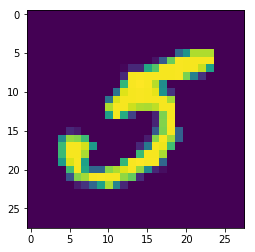

In [5]:
pylab.imshow(X[36000].reshape(28, 28))

In [6]:
y[36000]

5.0

### binary

In [7]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [8]:
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [9]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [10]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

In [11]:
sgd_clf.predict(X[36000].reshape(1, -1))

array([False], dtype=bool)

In [12]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([ 0.96495,  0.96305,  0.9603 ])

In [13]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator): 
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
    
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([ 0.9141 ,  0.9088 ,  0.90605])

In [14]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

from sklearn.metrics import confusion_matrix 
confusion_matrix(y_train_5, y_train_pred) 

array([[54057,   522],
       [ 1712,  3709]])

In [15]:
from sklearn.metrics import precision_score, recall_score

print(precision_score(y_train_5, y_train_pred))

print(recall_score(y_train_5, y_train_pred))

0.876624911368
0.684191108652


In [16]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.76854537919602162

In [17]:
2 * 0.840497737557 * 0.685297915514 / (0.685297915514 + 0.840497737557)

0.7550045727063589

In [18]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                                 method="decision_function")

In [19]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

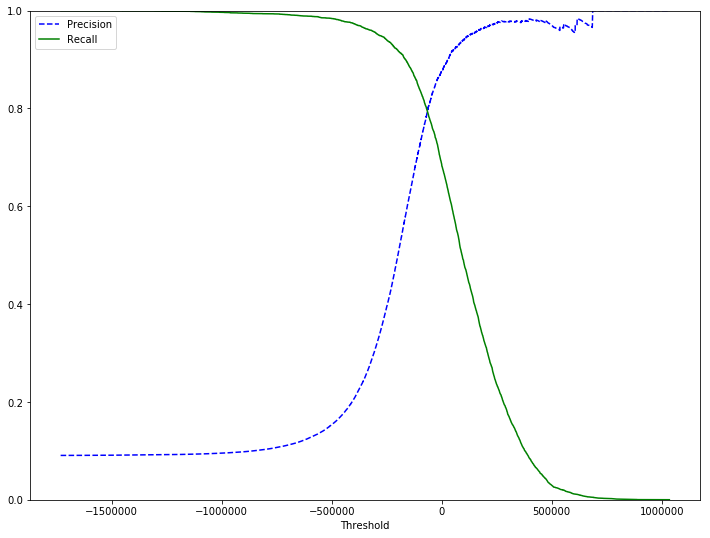

In [20]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds): 
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision") 
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall") 
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])

pylab.figure(figsize=(12,9))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)


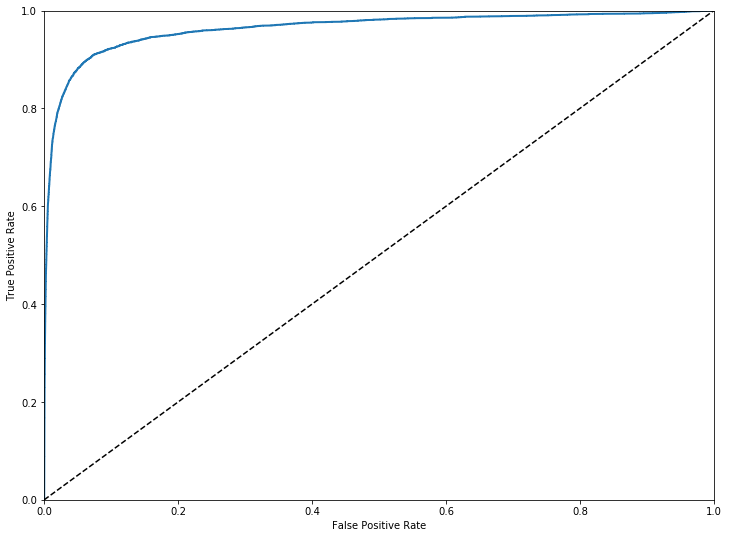

In [21]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)


def plot_roc_curve(fpr, tpr, label=None): 
    plt.plot(fpr, tpr, linewidth=2, label=label) 
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
pylab.figure(figsize=(12,9))
plot_roc_curve(fpr, tpr)

In [22]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.96366198755053345

In [23]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class 
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)


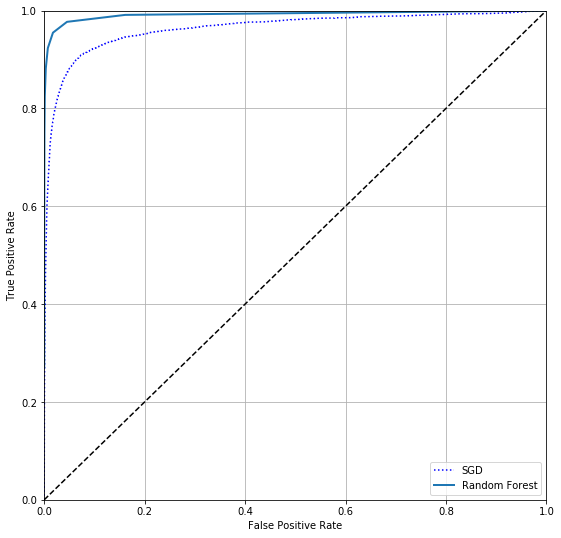

In [24]:
pylab.figure(figsize=(9,9))
pylab.plot(fpr, tpr, "b:", label="SGD")
pylab.grid()
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
pylab.legend(loc="lower right")

In [25]:
roc_auc_score(y_train_5, y_scores_forest)

0.99185261087182408

In [26]:
y_train_pred_rf = y_scores_forest > 0.54
print(precision_score(y_train_5, y_train_pred_rf))
print(recall_score(y_train_5, y_train_pred_rf))
print(f1_score(y_train_5, y_train_pred_rf))

0.98588442876
0.824571112341
0.898041185334


### multiclass

In [27]:
sgd_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

In [28]:
sgd_clf.predict(X[36000].reshape(1, -1))

array([ 5.])

In [29]:
sgd_clf.decision_function(X[36000].reshape(1, -1))

array([[-217898.41478456, -374555.64689467, -278173.19205045,
         -87743.66303649, -372557.21588855,   -4559.67827034,
        -554292.43042176, -377095.19756331, -560851.26736518,
        -628937.19056528]])

In [30]:
forest_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [31]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([ 0.83108378,  0.86734337,  0.86718008])

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([ 0.90996801,  0.91139557,  0.90923639])

In [33]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

In [34]:
conf_mx = confusion_matrix(y_train, y_train_pred)
print(conf_mx)

[[5725    2   24   12   11   48   51    8   40    2]
 [   2 6463   46   25    6   38    8    9  135   10]
 [  53   36 5349   96   74   24   96   50  166   14]
 [  50   35  140 5328    3  250   39   52  132  102]
 [  20   27   33   10 5372   10   50   31   82  207]
 [  76   38   40  160   73 4638  110   25  170   91]
 [  32   27   50    2   42   92 5619    6   47    1]
 [  24   19   71   27   61    9    4 5787   15  248]
 [  55  139   69  143   15  163   55   24 5049  139]
 [  45   30   29   86  180   39    1  183   74 5282]]


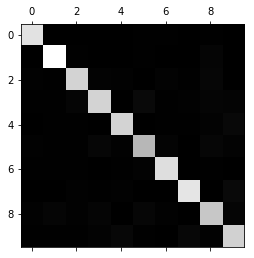

In [35]:
pylab.matshow(conf_mx, cmap=pylab.cm.gray)

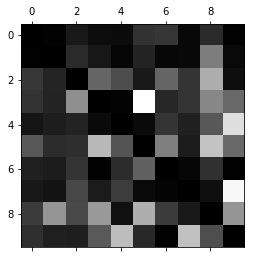

In [36]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
pylab.matshow(norm_conf_mx, cmap=pylab.cm.gray)

In [37]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary,
               interpolation="nearest")
    plt.axis("off")
    
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

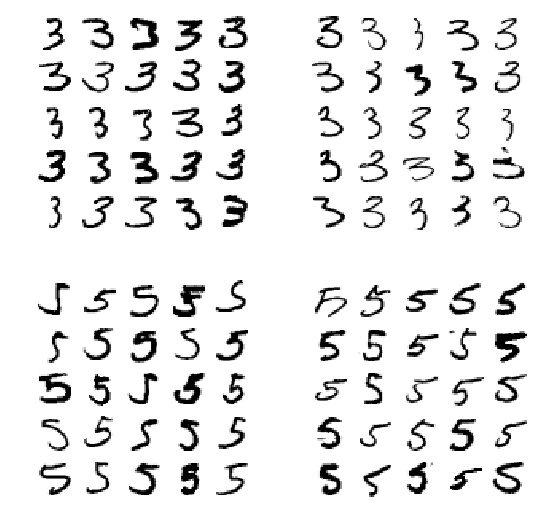

In [38]:
cl_a, cl_b = 3, 5

    
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

pylab.figure(figsize=(9, 9))
pylab.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
pylab.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
pylab.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
pylab.subplot(224); plot_digits(X_bb[:25], images_per_row=5)

### multilabel

In [39]:

from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [40]:
knn_clf.predict(X[36000].reshape(1, -1))

array([[False,  True]], dtype=bool)

In [41]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)
f1_score(y_train, y_train_knn_pred, average="macro")

0.96798687721788002

### multioutput

In [42]:
import numpy.random as rnd

noise = rnd.randint(0, 100, (len(X_train), 784))
noise = rnd.randint(0, 100, (len(X_test), 784))

X_train_mod = X_train + noise
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

ValueError: operands could not be broadcast together with shapes (60000,784) (10000,784) 

In [ ]:
knn_clf.fit(X_train_mod, y_train_mod)

clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)